In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
import random
import scipy.stats as stats
import matplotlib.colors as mcolors

# Import the data 

In [2]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data,columns=data.feature_names)
iris['species'] = data.target
iris = iris.rename(columns={ 'sepal length (cm)':'sl','sepal width (cm)':'sw','petal length (cm)':'pl','petal width (cm)':'pw'})

X1 = iris.pl[iris.species==1].values
X2 = iris.pl[iris.species==2].values

# Slide 1

In [3]:
numbins = 12
borders = np.linspace(3,7,numbins+1)

z = np.empty(numbins)
for i in range(numbins):
    x1 = X1[(X1>borders[i]) & (X1<borders[i+1])]
    x2 = X2[(X2>borders[i]) & (X2<borders[i+1])]
    n1 = float(len(x1))
    n2 = float(len(x2))
    if n1+n2==0:
        z[i] = None
    else:        
        z[i] = n2/(n1+n2)

        
centers = (borders[:-1]+borders[1:])/2

(2.8, 7.2)

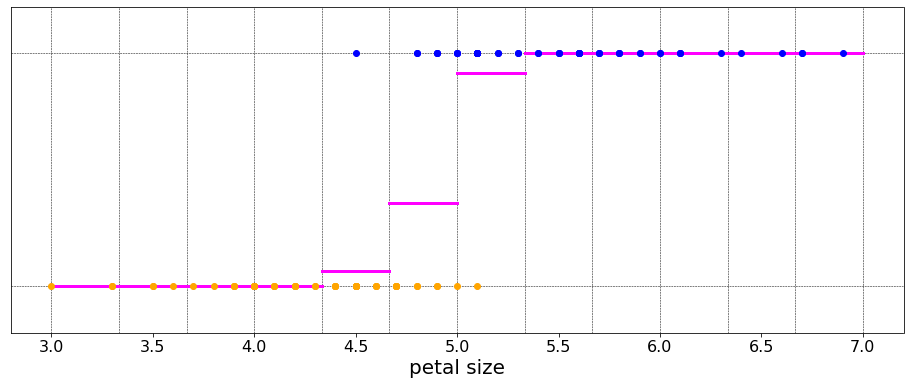

In [4]:

plt.figure(figsize=(16,6))
a1=plt.scatter(X1,np.zeros(len(X1)),color='orange')
a2=plt.scatter(X2,np.ones(len(X1)),color='blue')
for i in range(numbins):
    plt.plot([borders[i],borders[i+1]],[z[i],z[i]],linewidth=3,color='magenta')

a1.set_zorder(3)
a2.set_zorder(3)

plt.vlines(borders, -0.2,1.2, colors='k', linestyles='--', linewidth=0.5)
plt.hlines([0,1],2.8, 7.2, colors='k', linestyles='--', linewidth=0.5)

plt.yticks([])
plt.xticks(fontsize=16)
plt.xlabel('petal size', fontsize=20)
plt.ylim([-0.2,1.2])
plt.xlim([2.8, 7.2])

# Slide 2

In [5]:
mu1 = X1.mean()
mu2 = X2.mean()
sigmasquared = (X1.var()+X2.var())/2
mu1, mu2

mu1 = 4.5
mu2 = 5.2

(2.8, 7.0)

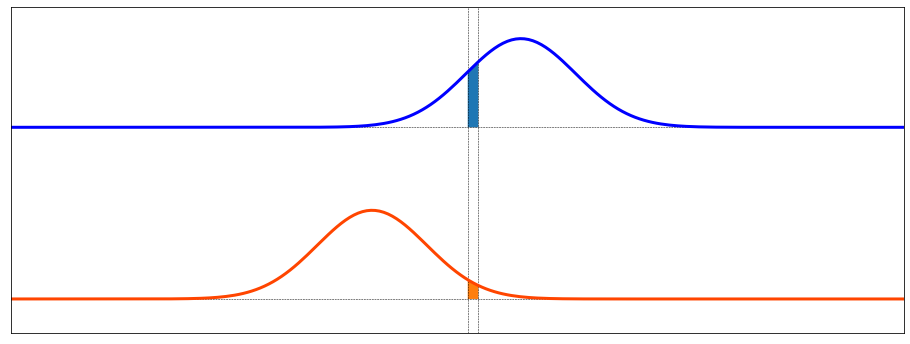

In [6]:
x = np.linspace(-3,7,500)

plt.figure(figsize=(16,6))
plt.plot(x,1+stats.norm.pdf(x,loc=mu2,scale=sigmasquared)/3,color='blue',linewidth=3)
plt.plot(x,0+stats.norm.pdf(x,loc=mu1,scale=sigmasquared)/3,color=mcolors.CSS4_COLORS['orangered'],linewidth=3)
plt.hlines([0,1],2.8, 7.2, colors='k', linestyles='--', linewidth=0.5)

x1 = np.linspace(4.95,5)
plt.fill_between(x1,1+stats.norm.pdf(x1,loc=mu2,scale=sigmasquared)/3,1)
plt.fill_between(x1,0+stats.norm.pdf(x1,loc=mu1,scale=sigmasquared)/3,0)

plt.vlines([4.95,5], -0.2,1.7, colors='k', linestyles='--', linewidth=0.5)

plt.yticks([])
plt.xticks([])
plt.ylim([-0.2,1.7])
plt.xlim([2.8, 7])

(-7.5, 7.5)

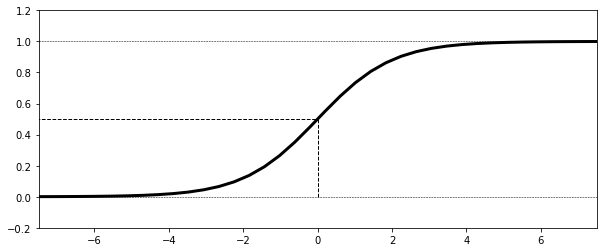

In [7]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))

plt.figure(figsize=(10,4))
plt.plot(x, y, 'k',linewidth=3)

plt.hlines([0,1],-10,10, colors='k', linestyles='--', linewidth=0.5)
plt.hlines([0.5],-10,0, colors='k', linestyles='--', linewidth=1)
plt.vlines(0,0,0.5, colors='k', linestyles='--', linewidth=1)

plt.ylim([-0.2,1.2])
plt.xlim([-7.5,7.5])


In [8]:
stats.norm.rvs?

(1.7, 6.5)

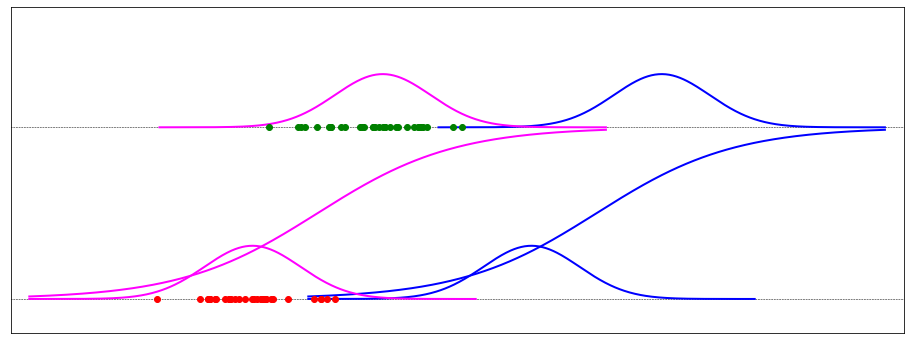

In [9]:
r = 1.2
s = 1.5
x = np.linspace(-3,7,500)


plt.figure(figsize=(16,6))

beta0 = (mu1**2-mu2**2)/2/sigmasquared
beta1 = (mu2-mu1)/sigmasquared

xmu = np.linspace(mu2-r,mu2+r,500)
plt.plot(xmu,1+stats.norm.pdf(xmu,loc=mu2,scale=sigmasquared)/5,color='blue',linewidth=2)

xmu = np.linspace(mu1-r,mu1+r,500)
plt.plot(xmu,0+stats.norm.pdf(xmu,loc=mu1,scale=sigmasquared)/5,color='blue',linewidth=2)

xmu = np.linspace(mu1-r,mu2+r,500)
plt.plot(xmu,1/(1+np.exp(-(beta0+beta1*xmu))),'blue',linewidth=2)

a1=plt.scatter(stats.norm.rvs(size=34,loc=mu1-s,scale=sigmasquared),np.zeros(34),color='red')
a2=plt.scatter(stats.norm.rvs(size=34,loc=mu2-s,scale=sigmasquared),np.ones(34),color='green')

###########
mu1s = mu1-s
mu2s = mu2-s

beta0 = (mu1s**2-mu2s**2)/2/sigmasquared
beta1 = (mu2s-mu1s)/sigmasquared

xmu = np.linspace(mu2s-r,mu2s+r,500)
plt.plot(xmu,1+stats.norm.pdf(xmu,loc=mu2s,scale=sigmasquared)/5,color='magenta',linewidth=2)

xmu = np.linspace(mu1s-r,mu1s+r,500)
plt.plot(xmu,0+stats.norm.pdf(xmu,loc=mu1s,scale=sigmasquared)/5,color='magenta',linewidth=2)

xmu = np.linspace(mu1s-r,mu2s+r,500)
plt.plot(xmu,1/(1+np.exp(-(beta0+beta1*xmu))),'magenta',linewidth=2)

############
a1.set_zorder(3)
a2.set_zorder(3)
plt.hlines([0,1],1.3, 7, colors='k', linestyles='--', linewidth=0.5)

plt.yticks([])
plt.xticks([])
plt.ylim([-0.2,1.7])
plt.xlim([1.7, 6.5])

(-7.5, 7.5)

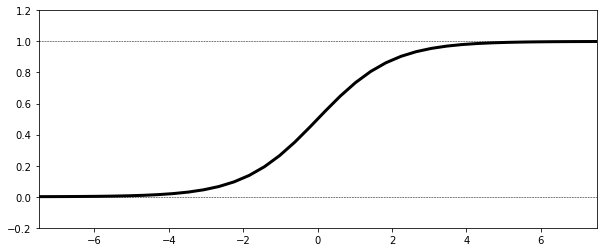

In [10]:
x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))

plt.figure(figsize=(10,4))
plt.plot(x, y, 'k',linewidth=3)

plt.hlines([0,1],-10,10, colors='k', linestyles='--', linewidth=0.5)


plt.ylim([-0.2,1.2])
plt.xlim([-7.5,7.5])
